In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [91]:
def parse_hipole(filename):
    with open(filename, 'rb') as f:
        buf = f.read().decode('GB2312')
        soup = BeautifulSoup(buf)
    rows = []
    drivers = set()
    for row in soup.find_all('tr'):
        cols = row.find_all('td')
        if len(cols) < 4:
            continue
        driver = cols[1].contents[0]
        if driver.name == 'a':
            driver = driver.contents[0].strip()
        else:
            driver = driver.strip()
        fastest = (not driver in drivers)
        drivers.add(driver)
        laptime = cols[3].contents[0].strip()
        ts = laptime.replace('.', ':').split(':')
        y = int(ts[0]) * 60 + int(ts[1]) + int(ts[2]) * 1e-3
        car = cols[2].contents[0].strip()
        rows.append((laptime, car, y, driver, fastest))
    return rows, drivers

In [92]:
rows, drivers = parse_hipole('hipole.html')

In [16]:
def parse_pxnr(filename):
    with open(filename, 'r') as f:
        soup = BeautifulSoup(f.read())
    
    table = soup.find('table')
    
    rows = []
    drivers = set()
    for row in table.find_all('tr'):
        cols = row.find_all('td')
        if len(cols) < 4:
            continue
        driver = cols[1].contents[0].strip()
        fastest = (not driver in drivers)
        drivers.add(driver)
        laptime = cols[2].find('b').contents[0].strip()
        ts = laptime.split(':')
        year = cols[4].contents[2].split('-')[-1].split(' ')[0]
        y = int(ts[0]) * 60 + int(ts[1]) + int(ts[2]) * 1e-3
        car = cols[3].contents[0].strip()
        if True or year == '2024':
            rows.append((laptime, car, y, driver, fastest))
    return rows, drivers

In [17]:
rows, drivers = parse_pxnr('GT3')

In [94]:
cars = list(set([c[1] for c in rows]))

In [95]:
gbc = dict()
ogbc = dict()
for c in cars:
    gbc[c] = []
    ogbc[c] = []
gbd = dict()
for d in drivers:
    gbd[d] = []
for t, c, y, d, f in rows:
    if f:
        gbc[c].append(y)
    else:
        ogbc[c].append(y)
    gbd[d].append((c, y))
cars = sorted(cars, key=lambda c: (gbc[c][0] if len(gbc[c]) > 0 else ogbc[c][0]))

Text(0.5, 1.0, 'Hipole lap time at Nurburgring (2024)')

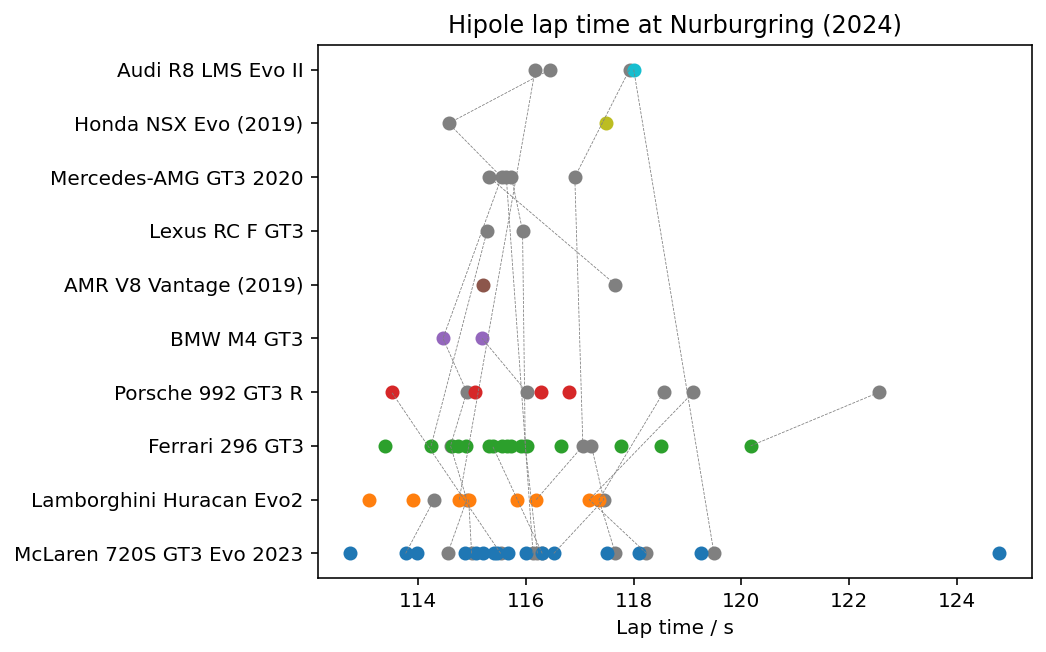

In [98]:
fig, ax = plt.subplots()
fig.set_dpi(144)
for y, c in enumerate(cars):
    ts = ogbc[c]
    ax.scatter(ts, [y] * len(ts), color='gray')
    ts = gbc[c]
    ax.scatter(ts, [y] * len(ts))

for d in drivers:
    gbd[d] = list(sorted(gbd[d], key=lambda y: cars.index(y[0])))
    ys = [cars.index(c) for c, y in gbd[d]]
    xs = [y for c, y in gbd[d]]
    if len(xs) > 1:
        ax.plot(xs, ys, color='gray', linestyle='--', linewidth=.4)

ax.set_yticks(np.arange(len(cars)))
ax.set_yticklabels(cars)
ax.set_xlabel('Lap time / s')
ax.set_title('Hipole lap time at Nurburgring (2024)')